<a href="https://colab.research.google.com/github/mariamwael10/Data-Classification/blob/main/DataClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Imports***

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# ***Dataset***

In [60]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', names = columns)

feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
X = data[feature_names]
display(data)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# ***Data Balancing and Splitting***
- value_counts() :Return a Series containing counts of unique rows in the DataFrame.
- np.random.choice(class , size, replace or not(replace :Default is True, meaning that a value of a can be selected multiple times.))

In [61]:
g = data[data.Class == 'g']
h = data[data.Class == 'h']
g_size = len(g)
h_size = len(h) 
difference = abs(g_size - h_size)

if g_size > h_size:
  extra_readings = np.random.choice(g.index, difference , replace=False)
  #update g after removing extra readings
  g = g.drop(extra_readings)

if h_size > g_size:
  extra_readings = np.random.choice(h.index, difference , replace=False)
  #update h after removing extra readings
  h = h.drop(extra_readings)

balanced_data = g.append(h)
display(balanced_data)
print(balanced_data['Class'].value_counts())

x = balanced_data[feature_names]
y = balanced_data['Class']
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.3, stratify=y)
display(x_train)
print(x_train.shape, x_test.shape)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


g    6688
h    6688
Name: Class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
7568,25.9722,22.4209,2.3683,0.7495,0.4090,29.6476,-11.9129,22.6940,15.7330,361.2820
18260,47.4957,13.4645,2.8429,0.3374,0.2017,45.5559,-19.2121,11.0517,13.0440,239.5110
18842,12.8939,7.8036,2.4047,0.5910,0.3380,23.7706,15.6823,-3.8764,65.4062,115.3426
9218,28.1264,22.3366,2.8630,0.3605,0.1981,-15.8589,22.5345,16.6081,56.2480,22.5963
14903,21.2509,10.8657,2.1847,0.5686,0.2843,14.7015,17.9440,7.8355,7.1820,123.8400
...,...,...,...,...,...,...,...,...,...,...
3797,55.8381,15.9545,2.9472,0.2191,0.1237,-16.0614,22.5488,-4.5357,6.1374,228.7220
14376,19.7823,2.9411,2.6506,0.5334,0.2869,19.7089,11.2428,11.4826,13.8023,203.5862
17529,180.9960,145.7830,4.4571,0.0516,0.0277,-63.5218,-160.8900,132.3880,67.1736,291.9940
16643,53.1566,51.1045,3.0273,0.1972,0.1085,59.1660,-36.0401,-51.6697,52.0250,91.5956


(9363, 10) (4013, 10)


In [62]:
y_train.value_counts()

g    4682
h    4681
Name: Class, dtype: int64

# ***Calculations***

In [63]:
def calculations(y_test, y_predicted):
  cm = confusion_matrix(y_test , y_predicted)
  #sensitivity = (TP) / (TP + FN)
  sensitivity = (cm[1][1]) / (cm[1][1] + cm[1][0])
    # specificity = (TN) / (TN + FP)
  specificity = (cm[0][0]) / (cm[0][0] + cm[0][1])
     # precision = (TP) / (TP + FP)
  precision = (cm[1][1]) / (cm[1][1] + cm[0][1])
     # f1_score = 2 * (precision * recall) / (precision + recall)
  f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

  Accuracy = accuracy_score(y_test, y_predicted)
  print("Accuracy = " ,Accuracy)
  print("Precision = " ,precision)
  print("Sensitivity = " ,sensitivity)
  print("Specificity = " ,specificity)
  print("F-score = " ,f1_score)

# ***Decision Tree***

Decision Tree:
              precision    recall  f1-score   support

           g       0.80      0.80      0.80      2006
           h       0.80      0.79      0.80      2007

    accuracy                           0.80      4013
   macro avg       0.80      0.80      0.80      4013
weighted avg       0.80      0.80      0.80      4013

Accuracy =  0.7986543732868179
Precision =  0.8011049723756906
Sensitivity =  0.794718485301445
Specificity =  0.80259222333001
F-score =  0.7978989494747374


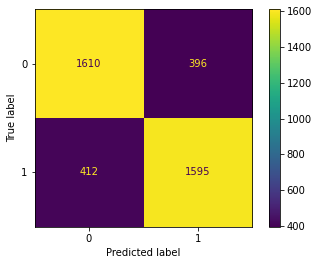

In [64]:
def decisionTree(x_train, x_test, y_train, y_test):
    classified = DecisionTreeClassifier().fit(x_train, y_train)
    y_predicted = classified.predict(x_test)
    print('Decision Tree:')
    print(classification_report(y_test, y_predicted))
    cm = confusion_matrix(y_test , y_predicted)
    temp = ConfusionMatrixDisplay(cm)
    calculations(y_test, y_predicted)
    temp.plot()
    plt.show()

decisionTree(x_train, x_test, y_train, y_test)  

# ***Naiive Bayes***

-------------------------------------------------------
Naive Bayes: 
              precision    recall  f1-score   support

           g       0.59      0.89      0.71      2006
           h       0.78      0.38      0.51      2007

    accuracy                           0.64      4013
   macro avg       0.69      0.64      0.61      4013
weighted avg       0.69      0.64      0.61      4013

Accuracy =  0.6369299775728882
Precision =  0.7829218106995884
Sensitivity =  0.37917289486796213
Specificity =  0.8948155533399801
F-score =  0.5109097012420275


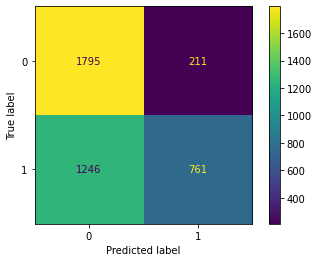

In [65]:
def naiveBayes(x_train, x_test, y_train, y_test):
    classified = GaussianNB().fit(x_train, y_train)
    y_predicted = classified.predict(x_test)
    print('-------------------------------------------------------')
    print('Naive Bayes: ')
    print(classification_report(y_test, y_predicted))
    cm = confusion_matrix(y_test , y_predicted)
    temp = ConfusionMatrixDisplay(cm)
    calculations(y_test, y_predicted)
    temp.plot()
    plt.show()

naiveBayes(x_train, x_test, y_train, y_test)

# ***K-NN***

In [47]:
scaler = MinMaxScaler()

cols = x_train.columns

x_train = scaler.fit_transform(x_train) #checks the values using an equation where big values =1 and small values =0 (negative values =-1)
x_test = scaler.transform(x_test) #do it on test data

#convert to panda as the past lines returns numpy
x_train = pd.DataFrame(x_train, columns=cols)
x_test = pd.DataFrame(x_test, columns=cols)

In [48]:
def plotParameter(x, y, title, x_label, y_label):
    plt.title(title, fontsize='16')
    plt.plot(x, y)
    plt.xlabel(x_label, fontsize='13')
    plt.ylabel(y_label, fontsize='13')
    plt.grid()
    plt.show()

In [49]:
def bestHyperparameter(start , end , step):
  k_range = range(start,end,step)
  k_score = []
  for i in k_range:
    classified = KNeighborsClassifier(n_neighbors= i)
    score = cross_val_score(classified , x_train , y_train, cv = StratifiedKFold(n_splits=5) , scoring= 'accuracy')
    k_score.append(score.mean())
  plotParameter(k_range, k_score, "K Values", "k_values", "Mean Accuracy")
  return k_range[k_score.index(max(k_score))]

-------------------------------------------------------
K-NN: 


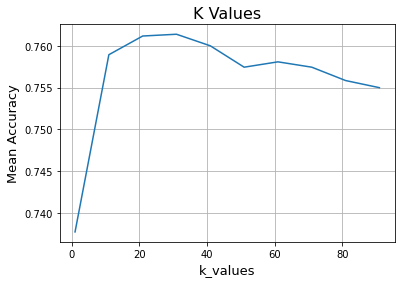

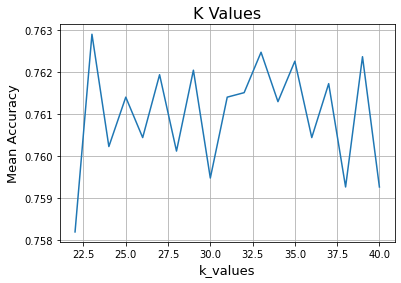

Old K value:  31
best K value:  23
              precision    recall  f1-score   support

           g       0.72      0.87      0.79      2006
           h       0.84      0.66      0.74      2007

    accuracy                           0.77      4013
   macro avg       0.78      0.77      0.76      4013
weighted avg       0.78      0.77      0.76      4013

Accuracy =  0.7662596561176177
Precision =  0.8397965670692944
Sensitivity =  0.658196312904833
Specificity =  0.8743768693918246
F-score =  0.7379888268156425


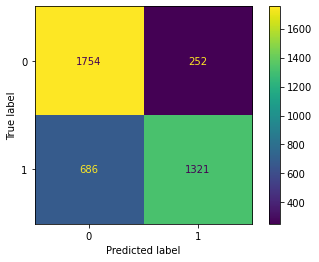

In [66]:
def kNearestNeighbour(x_train, x_test, y_train, y_test):
  print('-------------------------------------------------------')
  print('K-NN: ')
  old_k = bestHyperparameter(1,100,10)
  new_k = bestHyperparameter(old_k - 9, old_k + 10 , 1 )
  print('Old K value: ',old_k)
  print('best K value: ',new_k)
  classified = KNeighborsClassifier(n_neighbors= new_k)
  model = classified.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  print(classification_report(y_test, y_predicted))
  cm = confusion_matrix(y_test , y_predicted)
  temp = ConfusionMatrixDisplay(cm)
  calculations(y_test, y_predicted)
  temp.plot()
  plt.show()
kNearestNeighbour(x_train, x_test, y_train, y_test)

# ***Random Forest***

In [ ]:
def bestEstimator(start, end ,step):
  n_range = range(start , end, step)
  n_score = []
  for i in n_range:
    classified = RandomForestClassifier(n_estimators= i)
    score = cross_val_score(classified , x_train , y_train, cv = StratifiedKFold(n_splits=7) , scoring= 'accuracy')
    n_score.append(score.mean())
  plotParameter(n_range, n_score, "N_estimators graph", "n_values", "Mean Accuracy")
  return n_range[(n_score.index(max(n_score)))]

-------------------------------------------------------
Random forest: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

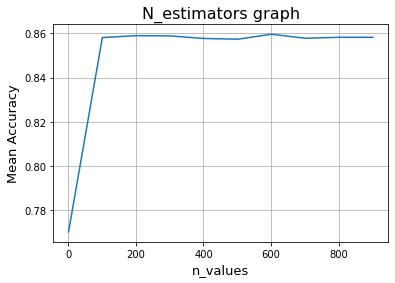

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

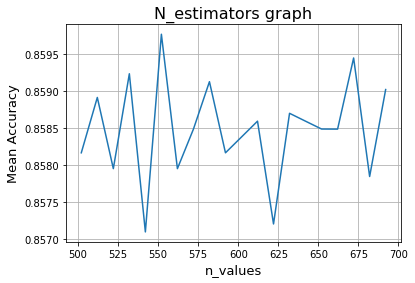

N_estimator :  601
N_estimator :  552


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           g       0.84      0.88      0.86      2029
           h       0.88      0.83      0.85      1984

    accuracy                           0.86      4013
   macro avg       0.86      0.86      0.86      4013
weighted avg       0.86      0.86      0.86      4013



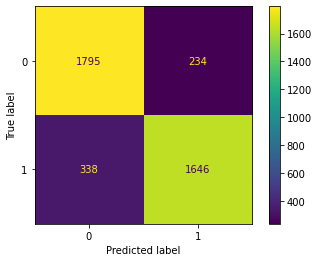

In [ ]:
def randomForest(x_train, x_test, y_train, y_test):
  print('-------------------------------------------------------')
  print('Random forest: ')
  old_estimator = bestEstimator(1,1000,100)
  new_estimator = bestEstimator(old_estimator - 99 ,old_estimator + 100 ,10)
  print( "N_estimator : " , old_estimator)
  print( "N_estimator : " , new_estimator)
  classified =RandomForestClassifier(n_estimators= new_estimator)
  model = classified.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  print(classification_report(y_test, y_predicted))
  cm = confusion_matrix(y_test , y_predicted)
  temp = ConfusionMatrixDisplay(cm)
  calculations(y_test, y_predicted)
  temp.plot()
  plt.show()

randomForest(x_train, x_test, y_train, y_test)

# ***AdaBoost***

In [ ]:
def bestEstimator2(start, end ,step):
  n_range = range(start , end, step)
  n_score = []
  for i in n_range:
    classified = AdaBoostClassifier(n_estimators= i)
    score = cross_val_score(classified , x_train , y_train, cv = StratifiedKFold(n_splits=5) , scoring= 'accuracy')
    n_score.append(score.mean())
  plotParameter(n_range, n_score, "N_estimators graph for AdaBoost", "n_values", "Mean Accuracy")
  return n_range[(n_score.index(max(n_score)))]

-------------------------------------------------------
AdaBoost: 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

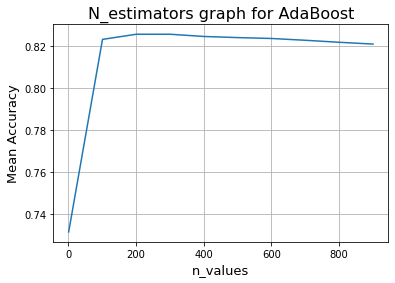

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

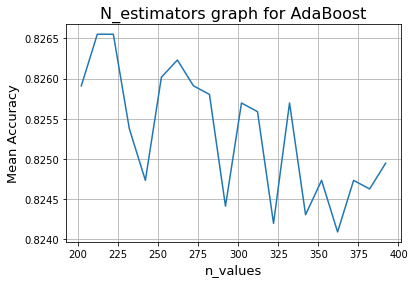

N_estimator :  301
N_estimator :  222


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           g       0.82      0.84      0.83      2029
           h       0.83      0.81      0.82      1984

    accuracy                           0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013



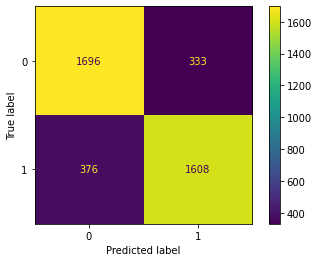

In [ ]:
def adaBoost(x_train, x_test, y_train, y_test):
  print('-------------------------------------------------------')
  print('AdaBoost: ')
  old_estimator = bestEstimator2(1,1000,100)
  new_estimator = bestEstimator2(old_estimator - 99 ,old_estimator + 100 ,10)
  print( "N_estimator : " , old_estimator)
  print( "N_estimator : " , new_estimator)
  classified = AdaBoostClassifier(n_estimators= new_estimator)
  model = classified.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  print(classification_report(y_test, y_predicted))
  cm = confusion_matrix(y_test , y_predicted)
  temp = ConfusionMatrixDisplay(cm)
  calculations(y_test, y_predicted)
  temp.plot()
  plt.show()

adaBoost(x_train, x_test, y_train, y_test)

Decision Tree:
              precision    recall  f1-score   support

           g       0.80      0.77      0.79      2025
           h       0.78      0.81      0.79      1988

    accuracy                           0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013



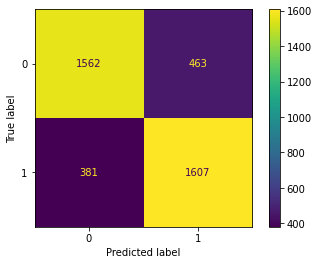

-------------------------------------------------------
Naive Bayes: 
              precision    recall  f1-score   support

           g       0.61      0.90      0.72      2025
           h       0.80      0.41      0.54      1988

    accuracy                           0.66      4013
   macro avg       0.70      0.65      0.63      4013
weighted avg       0.70      0.66      0.64      4013



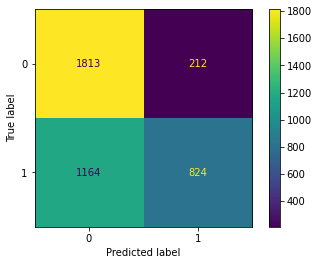

-------------------------------------------------------
K-NN: 


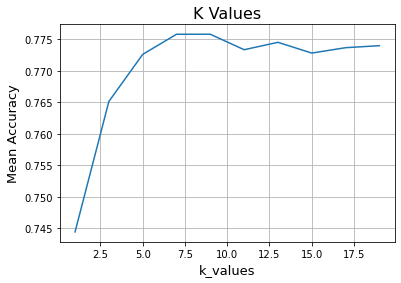

              precision    recall  f1-score   support

           g       0.70      0.89      0.78      2025
           h       0.84      0.60      0.70      1988

    accuracy                           0.75      4013
   macro avg       0.77      0.75      0.74      4013
weighted avg       0.77      0.75      0.74      4013



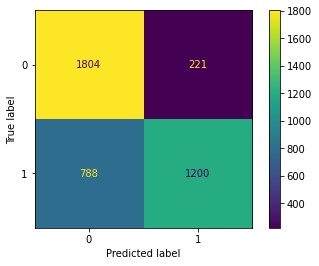

-------------------------------------------------------
Random forest: 


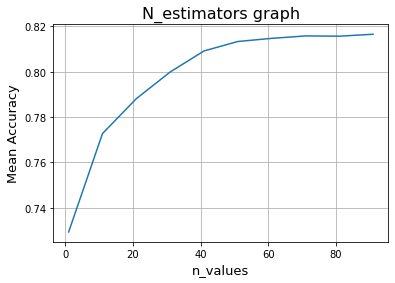

N_estimator : 
10
              precision    recall  f1-score   support

           g       0.82      0.88      0.85      2025
           h       0.87      0.80      0.84      1988

    accuracy                           0.84      4013
   macro avg       0.84      0.84      0.84      4013
weighted avg       0.84      0.84      0.84      4013



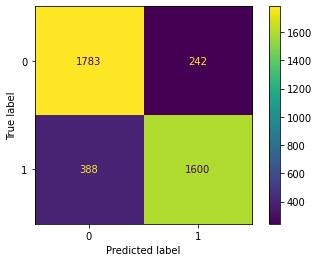

-------------------------------------------------------
AdaBoost: 


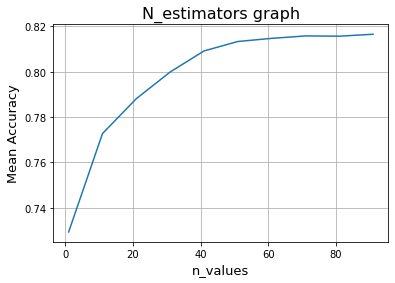

N_estimator : 
10
              precision    recall  f1-score   support

           g       0.81      0.76      0.78      2025
           h       0.77      0.81      0.79      1988

    accuracy                           0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013



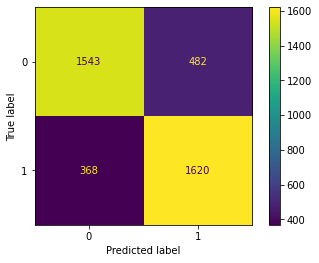

In [ ]:
classifications = [decisionTree, naiveBayes, kNearestNeighbour, randomForest, adaBoost]
for classification in classifications:
  classification(x_train, x_test, y_train, y_test)

The bonus part:

In [ ]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold
from sklearn import preprocessing

n_input, n_hidden, n_out, batch_size, learning_rate=10, 8, 2, 128, 0.001

columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', names = columns)

feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
X = data[feature_names]
display(data)

g = data[data.Class == 'g']
h = data[data.Class == 'h']
g_size = len(g)
h_size = len(h) 
difference = abs(g_size - h_size)
if g_size > h_size:
  extra_readings = np.random.choice(g.index, difference , replace=False)
  #update g after removing extra readings
  g = g.drop(extra_readings)

if h_size > g_size:
  extra_readings = np.random.choice(h.index, difference , replace=False)
  #update h after removing extra readings
  h = h.drop(extra_readings)

balanced_data = g.append(h)
display(balanced_data)
print(balanced_data['Class'].value_counts())

le = preprocessing.LabelEncoder()
balanced_data["Class"]=le.fit_transform(balanced_data["Class"])
print(balanced_data)

x = balanced_data[feature_names]
y = balanced_data['Class']
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.3)
display(x_train)
print(x_train.shape, x_test.shape)  








,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g
10,62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.7710,9.9144,323.0940,g
13,33.1818,12.4655,2.4955,0.4696,0.2412,-17.0341,-22.0762,-8.1803,41.9290,41.3816,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


g    6688
h    6688
Name: Class, dtype: int64
        fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967  16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
3       23.8172   9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
9       46.7619  15.1993  2.5786  0.3377  0.1913   24.7548   43.8771   
10      62.7766  29.9104  3.3331  0.2475  0.1261  -33.9065   57.5848   
13      33.1818  12.4655  2.4955  0.4696  0.2412  -17.0341  -22.0762   
...         ...      ...     ...     ...     ...       ...       ...   
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  Class  
0       -8.2027  40.0920   81.8828      0  
3

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
10994,67.4425,32.8836,3.5049,0.1335,0.0699,78.1634,61.0923,-27.9646,11.6103,188.4030
15799,47.1330,5.0732,2.7551,0.3692,0.2252,49.3526,31.3435,2.8755,35.9407,171.9951
3690,37.7370,23.0461,2.8639,0.2886,0.1662,42.0576,24.3458,-10.9927,20.5830,221.4960
6712,30.2573,12.6829,2.2304,0.5647,0.3265,18.1574,18.4985,7.1750,29.8650,153.2070
15224,157.9876,82.8141,3.1533,0.3786,0.2174,-170.8765,-138.2061,-64.0302,27.9254,387.7986
...,...,...,...,...,...,...,...,...,...,...
9105,28.3463,13.4075,2.4433,0.5297,0.3009,34.0842,17.2129,-12.7297,6.7850,169.6420
16705,21.1622,17.2962,2.5516,0.5177,0.2206,-4.1092,12.0874,5.8623,62.3566,144.1204
178,20.4525,7.2419,2.1775,0.7243,0.3754,2.1721,-9.6562,-5.7228,9.1256,159.1260
1807,59.3377,26.1354,3.1764,0.3651,0.1975,2.3544,33.5577,13.8393,4.3190,339.7510


(9363, 10) (4013, 10)


In [ ]:
from torch.utils.data import Dataset
import numpy as np

class Data(Dataset):
    def __init__(self, x, y):
        self.X =torch.from_numpy(np.asarray(x))
        self.y = torch.from_numpy(np.asarray(y))
        self.len = self.X.shape[0]

    def __getitem__(self,index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

batch_size = 128
#instance = Data(x_train,y_train).__new__(x_train,y_train)
train_data = Data(x_train,y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(x_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch + 1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break



Batch: 1
X shape: torch.Size([128, 10])
y shape: torch.Size([128])


In [ ]:
model = nn.Sequential(nn.Linear(10, 8),
                      nn.ReLU(),
                      nn.Linear(8,2),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=2, bias=True)
  (3): Sigmoid()
)


In [ ]:
import torch.optim as optim
import torch

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

x_tt=x_train.to_numpy()
y_tt=y_train.to_numpy()
losses = []
for epoch in range(5000):
    pred_y = model(torch.from_numpy(x_tt).to(torch.float32))
    print(pred_y.size())
    pred_yresize=pred_y.reshape(-1,)
    print(pred_yresize.size())
    print(torch.from_numpy(y_tt).size())
    loss = loss_function(pred_yresize, torch.from_numpy(y_tt))
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

torch.Size([9363, 2])
torch.Size([18726])
torch.Size([9363])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([9363])) that is different to the input size (torch.Size([18726])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored